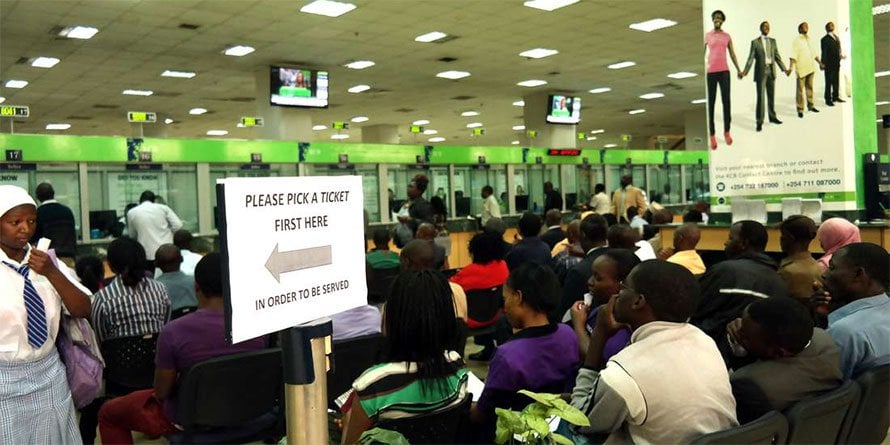

Below is Tele Bank's customer dataset, sourced from Kaggle.

We intend to analyze it with an aim of extracting as many financial insights as possible that will help the company stay healthy.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/test.csv')

**DATA CLEANING**

In [ ]:
df.head(8)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2.0,0.00,2.0,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2.0,0.00,1.0,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7.0,0.00,2.0,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8.0,0.00,1.0,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10.0,121263.62,1.0,1.0,0.0,139431.00
5,165039,15672704,Pearson,593,France,Female,22.0,9.0,0.00,2.0,0.0,0.0,51907.72
6,165040,15647838,Onyemere,682,Spain,Male,45.0,4.0,0.00,2.0,1.0,1.0,157878.67
7,165041,15775307,Hargreaves,539,Spain,Female,47.0,8.0,0.00,2.0,1.0,1.0,126784.29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    110023 non-null  int64   
 1   CustomerId            110023 non-null  int64   
 2   Surname               110023 non-null  object  
 3   Geography             110023 non-null  object  
 4   Gender                110023 non-null  uint8   
 5   Age                   110023 non-null  float64 
 6   Tenure                110023 non-null  int64   
 7   Balance               110023 non-null  float64 
 8   NumOfProducts         110023 non-null  int64   
 9   HasCrCard             110023 non-null  int64   
 10  IsActiveMember        110023 non-null  int64   
 11  EstimatedSalary       110023 non-null  float64 
 12  CreditScore_Category  108349 non-null  category
dtypes: category(1), float64(3), int64(6), object(2), uint8(1)
memory usage: 10.3+ MB


The dataset has 110,023 entries(read customers)

In [ ]:
#check for null values
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [ ]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object

In [ ]:
df=df.drop_duplicates()

In [ ]:
df=df.dropna()

In [ ]:
#we can create dummy variables for gender as its categorical data
df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)

In [ ]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,0,23.0,2.0,0.00,2.0,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,0,46.0,2.0,0.00,1.0,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,0,34.0,7.0,0.00,2.0,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,1,36.0,8.0,0.00,1.0,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,1,38.0,10.0,121263.62,1.0,1.0,0.0,139431.00


In [ ]:
#let's round the fields HasCrCard & IsActiveMember are categorical data represented by dummies, round to 0 decimal places for simplicity

#we first fill any NaN (non-finite values) with 0 so that we can transform the fields to integers
df['HasCrCard'] = df['HasCrCard'].fillna(0)
df['IsActiveMember'] = df['IsActiveMember'].fillna(0)

df['HasCrCard'] = df['HasCrCard'].round(0).astype(int)
df['IsActiveMember'] = df['IsActiveMember'].round(0).astype(int)


In [ ]:
#let's also convert Salary to 0 decimal place as the cents merely tell us anything
df['EstimatedSalary'] = df['EstimatedSalary'].round(0).astype(int)


In [ ]:
df.head(3)

,id,CustomerId,Surname,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_Category
0,165034,15773898,Lucchese,France,0,23.0,2,0.0,2,0,1,160977,Fair
1,165035,15782418,Nott,France,0,46.0,2,0.0,1,1,0,72549,Good
2,165036,15807120,K?,France,0,34.0,7,0.0,2,1,0,138882,Fair


Let's introduce a credit score field with the categories:

1. 300-579=Poor
2. 580-669=Fair
3. 670-739=Good
4. 740-799=Very Good
5. 800-850= Exceptional

This is to help us enhance our visualization of Credit_score



In [ ]:
bins = [300, 579, 669, 739, 799, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

#create a new field
df['CreditScore_Category'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)


In [ ]:
df.head()

,id,CustomerId,Surname,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_Category
0,165034,15773898,Lucchese,France,0,23.0,2,0.00,2,0,1,160976.75,Fair
1,165035,15782418,Nott,France,0,46.0,2,0.00,1,1,0,72549.27,Good
2,165036,15807120,K?,France,0,34.0,7,0.00,2,1,0,138882.09,Fair
3,165037,15808905,O'Donnell,France,1,36.0,8,0.00,1,1,0,113931.57,Good
4,165038,15607314,Higgins,Germany,1,38.0,10,121263.62,1,1,0,139431.00,Very Good


**DATA ANALYSIS**

**1. Credit Score**

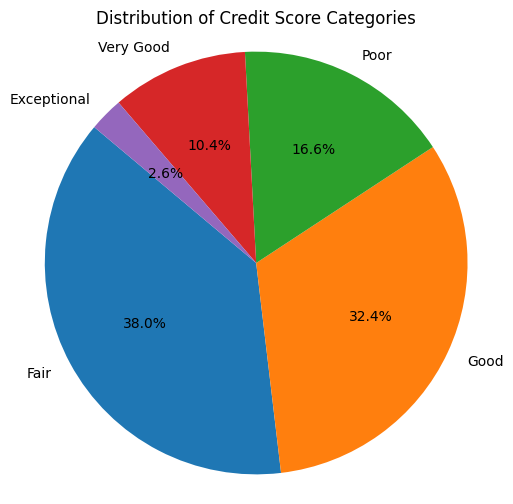

In [ ]:
#let's visualize the credit score field
#count the occurrences of each category in 'CreditScore_Category'

category_counts = df['CreditScore_Category'].value_counts()
# Plot a pie chart
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Score Categories')
# Equal aspect ratio ensures that pie is drawn as a circle

plt.axis('equal')
plt.show()

There is our credit score visualization.

At first sight you notice how big Fair is.
This means whichever side it leans to, Good or Poor, there will be major ripples.
This category can be financialy educated as an investment to swing them to the 'Good' category.

The Good score is also heavily populated, with thought out decisions to bar them from dipping into Fair score and consitent support to drive them towards Very Good, revenues may be steady and growing in the long run.

We are assuming the higher the numbers from Good to Exceptional, the healthier the business.

In [ ]:
#let's see the salary intervals
highest_salary=df['EstimatedSalary'].max()
lowest_salary=df['EstimatedSalary'].min()

print(f'The highest and lowest salaries are {highest_salary} and {lowest_salary} respectively')


The highest and lowest salaries are 199992 and 12 respectively


**2. Salary and Account Balance**


Let's create salary intervals to help us map what our customers' monthly income.

In [ ]:
bin_edges=[0, 50000, 100000, 150000, 200000]
bin_labels=['50K', '100K', '150K', '200K']
df['Salary_intervals']=pd.cut(df['EstimatedSalary'], bins=bin_edges, labels=bin_labels)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_Category,Salary_intervals
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0,1,160977,Fair,200K
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1,0,72549,Good,100K
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1,0,138882,Fair,150K
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1,0,113932,Good,150K
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1,0,139431,Very Good,150K


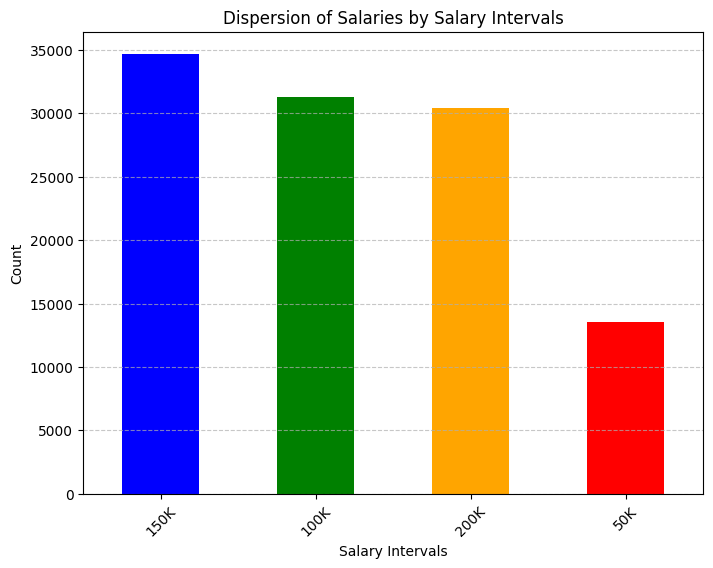

In [ ]:
#let's visualize the results
#count the occurrences of each bin in 'Salary_intervals'
bin_counts = df['Salary_intervals'].value_counts()

#plot a bar graph
plt.figure(figsize=(8, 6))
bin_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Dispersion of Salaries by Salary Intervals')
plt.xlabel('Salary Intervals')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to y-axis
plt.show()

In [ ]:
bin_edges=[0, 50000, 100000, 150000, 200000]
bin_labels=['50K', '100K', '150K', '200K']
df['Account_balance']=pd.cut(df['Balance'], bins=bin_edges, labels=bin_labels)

#convert Account_balance to object so as to fill values NaN with 0, 0 will enable us do calculations
df['Account_balance'] = df['Account_balance'].astype('object')
df['Account_balance'].fillna('0', inplace=True)

#transform to category variables for visualization
df['Account_balance'] = df['Account_balance'].astype('category')


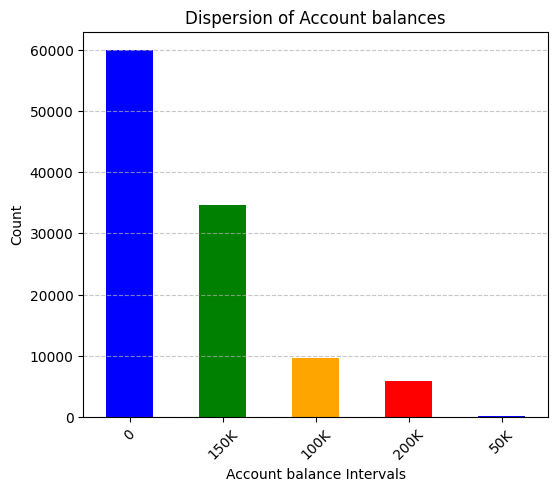

In [ ]:
#visualize account balance

intervals = df['Account_balance'].value_counts()

#plot a bar graph
plt.figure(figsize=(6, 5))
intervals.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Dispersion of Account balances')
plt.xlabel('Account balance Intervals')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to y-axis
plt.show()

What insights can we deduce here? Let's assume this is end month data.

1. A majority of the customers live paycheck to paycheck. A factor to consider in product making.

2. There is a sizeable number of customers with good balances. A supported-consistent savings culture if realized from these numbers, may offer the bank increased working capital.

3. Bank has a good number of customers with great incomes, this insight may help in customizing products.
Research on customers' expenditure may supplement the products customization.

4. Such categorization may help the bank target its market.

In [ ]:
#Say we want to simplify the data for the bank, let's create dataframes for customer details by account balance and incomes.

#let's start with salary
salary_200k = df[df['Salary_intervals'] == '200K']
salary_150k = df[df['Salary_intervals'] == '150K']
salary_100k = df[df['Salary_intervals'] == '100K']
salary_50k = df[df['Salary_intervals'] == '50K']

#organize balance
balance_200k= df[df['Account_balance'] == '200K']
balance_150k= df[df['Account_balance'] == '150K']
balance_100k= df[df['Account_balance'] == '100K']
balance_50k= df[df['Account_balance'] == '50K']
balance_0= df[df['Account_balance'] == '0']


In [ ]:
#visualize the newly organized dataframes
#which of our cx have 0 account balance?
balance_0.head(5)

,id,CustomerId,Surname,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_Category,Salary_intervals,Account_balance
0,165034,15773898,Lucchese,France,0,23.0,2,0.0,2,0,1,160977,Fair,200K,0
1,165035,15782418,Nott,France,0,46.0,2,0.0,1,1,0,72549,Good,100K,0
2,165036,15807120,K?,France,0,34.0,7,0.0,2,1,0,138882,Fair,150K,0
3,165037,15808905,O'Donnell,France,1,36.0,8,0.0,1,1,0,113932,Good,150K,0
5,165039,15672704,Pearson,France,0,22.0,9,0.0,2,0,0,51908,Fair,100K,0


**3. Market**

In [ ]:
#let's map customer distribution by geography
df['Geography'].unique()

array(['France', 'Germany', 'Spain'], dtype=object)

Our customers hail from 3 countries

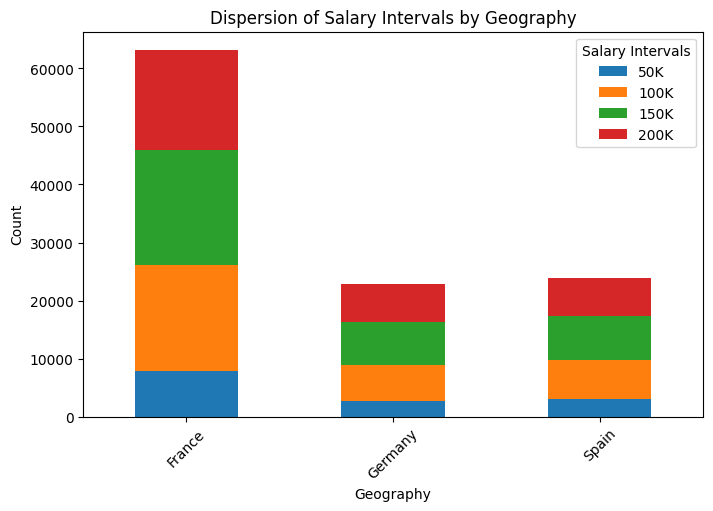

In [ ]:
grouped = df.groupby(['Geography', 'Salary_intervals']).size().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(8, 5))

plt.title('Dispersion of Salary Intervals by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Salary Intervals')
plt.show()


Such categorized information may assist in understanding markets and make decisions based on that.

The graph helps show size of customers income salary interval in a market. This may help customize products to maximize retention and realized oppurtunities.

**4. Age & Tenure**

In [ ]:
# age can tell important tales
highest_age=df['Age'].max()
lowest_age=df['Age'].min()

print(f'The highest and lowest ages are {highest_age} and {lowest_age} respectively')

The highest and lowest ages are 92.0 and 18.0 respectively


In [ ]:
#let's categorize age for visualization

bin_edges = [18, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df['Age_Intervals'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)
df.head(2)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_Category,Salary_intervals,Account_balance,Age_Intervals
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.0,2,0,1,160977,Fair,200K,0,18-29
1,165035,15782418,Nott,683,France,Female,46.0,2,0.0,1,1,0,72549,Good,100K,0,40-49


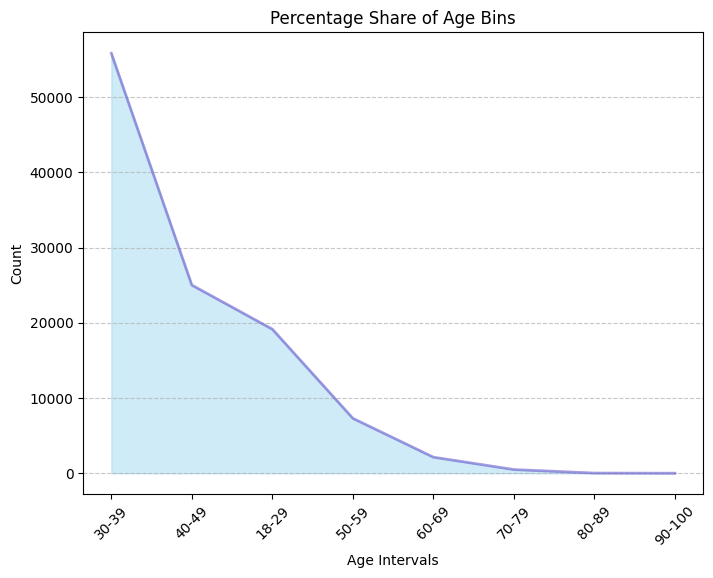

In [ ]:

age_bin_counts = df['Age_Intervals'].value_counts()
plt.figure(figsize=(8, 6))
plt.fill_between(age_bin_counts.index, age_bin_counts, color='skyblue', alpha=0.4)
plt.plot(age_bin_counts.index, age_bin_counts, color='Slateblue', alpha=0.6, linewidth=2)

# Add labels and title
plt.title('Percentage Share of Age Bins')
plt.xlabel('Age Intervals')
plt.ylabel('Count')
plt.xticks(age_bin_counts.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to y-axis
plt.show()

Most customers fall on age group 30-39, it could result from decreased unemployment rate around this age group, increased economic participation (investments & enterprises)

Acknowledging this insight, bank may design relevant product marketing that heavily reasonates with age group, the ideas are endless.

But there are several questions to ask;

1. Why does number of account holders decrease as age increases?

could be the data is from a ten year period, deaths, low financial knowledge in a certain group?

2. Age 18-29 could be targeted, nurtured with reasonable products so as to increase tenure period which may drive stable revenue growth.

3. Age group 30-39 can swing the fate to either side of increased/decreased revenues. Its worth an interesting investment.

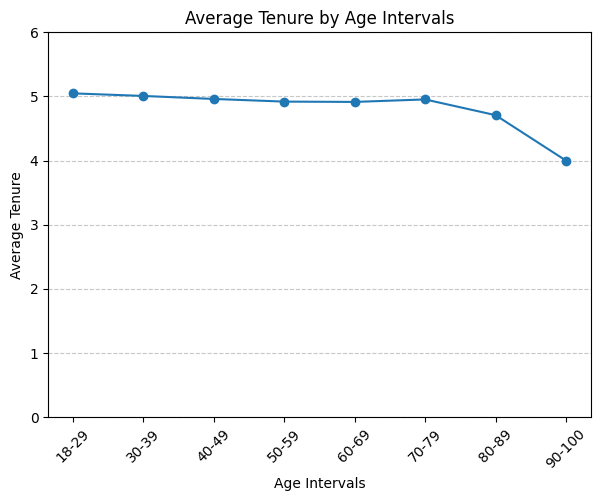

In [ ]:
#let's get average tenure period for each age bracket, we assume elderly age brackets have higher tenures
#our null hypothesis is tenure increases with age

# Calculate the average tenure for each age interval
average_tenure_by_age = df.groupby('Age_Intervals')['Tenure'].mean().reset_index()

plt.figure(figsize=(7, 5))
plt.plot(average_tenure_by_age['Age_Intervals'], average_tenure_by_age['Tenure'], marker='o', linestyle='-')
plt.title('Average Tenure by Age Intervals')
plt.xlabel('Age Intervals')
plt.ylabel('Average Tenure')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0,6)
plt.show()


With the exception of 70-79, Tenure evidently drops as customers grow older. Rendering our assumptions null and void.

We however notice the average tenure lingers around 5 years.

Why could this be? May be the elderly opened accounts when already old, may be they also lost jobs and stopped banking, may be death?

Such an insight may suggest its time people are more and more embracing banking thus the bank could position itself well.

**5. Active accounts**

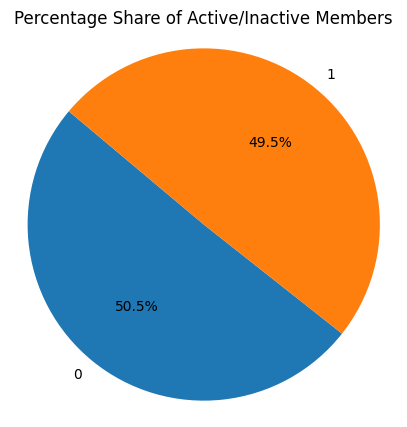

In [ ]:
#how many of the 110K+ customers are actively banking

active_inactive_counts = df['IsActiveMember'].value_counts()

# Plot a pie chart
plt.figure(figsize=(5, 5))
plt.pie(active_inactive_counts, labels=active_inactive_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Share of Active/Inactive Members')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Whoaa! Almost half of the customers are inactive.
We could say the bank is not operating at it's full capacity as inactive members rarely or don't bring in revenues.

Bank may also be loosing money by marketing to these customers, expanding to areas where most of the cx's are inactive or just by directing resources to this huge number.

Suffice to say, there are 1 in 2 cx's who are inactive thus 50% of your marketing is likely to be ineffective.

BUT, let's explore the potentiality of these customers. What is their average estimated salary?


In [ ]:
inactive_members_df = df[df['IsActiveMember'] == 0]
# Calculate the average estimated salary of inactive members

average_salary_inactive_members = inactive_members_df['EstimatedSalary'].mean()
print("Average estimated salary of inactive members:", round(average_salary_inactive_members,2))

Average estimated salary of inactive members: 112806.34


Inactive members have an average estimated salary of 112806.34! meaning there is much potential in these numbers.

How many have salaries above 112806.34?

In [ ]:
# Calculate the total number of inactive members
total_inactive_members = len(df[df['IsActiveMember'] == 0])

inactive_members_above_threshold = df[(df['IsActiveMember'] == 0) & (df['EstimatedSalary'] > 112806.34)]
count_inactive_members_above_threshold = len(inactive_members_above_threshold)

# Calculate the percentage share of inactive members with a salary above average
percentage_inactive_above_threshold = (count_inactive_members_above_threshold / total_inactive_members) * 100
percentage_inactive_above_threshold=round(percentage_inactive_above_threshold,2)
print("Percentage share of inactive members with salary above average is:", percentage_inactive_above_threshold, "%")

Percentage share of inactive members with salary above average is: 53.07 %


The bank has a good number of potential inactive customers (53% of inactive) who may be incentivized into active customers.

In [ ]:
#create dataframe of these cx's incase bank needs it
inactive_customers_above_average = df[(df['IsActiveMember'] == 0) & (df['EstimatedSalary'] > 112806)]
inactive_customers_above_average.head(4)

,id,CustomerId,Surname,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_Category,Salary_intervals,Account_balance,Age_Intervals
2,165036,15807120,K?,France,0,7,0.00,2,1,0,138882,Fair,150K,0,30-39
3,165037,15808905,O'Donnell,France,1,8,0.00,1,1,0,113932,Good,150K,0,30-39
4,165038,15607314,Higgins,Germany,1,10,121263.62,1,1,0,139431,Very Good,150K,150K,30-39
11,165045,15757895,T'ang,France,1,4,0.00,2,1,0,181419,Fair,200K,0,30-39


In [ ]:
#which market has the highest inactive members

member_counts = df.groupby(['Geography', 'IsActiveMember']).size().unstack(fill_value=0)

# Calculate the percentage share
member_percentages = member_counts.div(member_counts.sum(axis=1), axis=0) * 100
member_percentages=round(member_percentages,2)
print("Percentage Share of Active and Inactive Members per Geography:")
print(member_percentages)

Percentage Share of Active and Inactive Members per Geography:
IsActiveMember      0      1
Geography                   
France          49.56  50.44
Germany         54.06  45.94
Spain           49.47  50.53


Germany has the highest count of inactive members.
Tele Bank could investigate reasons as to why.

Tele Bank could strategize to convert by Geography/Market using this insight.



In [ ]:
#how many cx's have credit scores > 'Very Good'?

#Map the 'CreditScore_Category' column to numerical values using the defined mapping
# Define a dictionary to map credit score categories to numerical values
score_category_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Exceptional': 4
}
df['CreditScore_Num'] = df['CreditScore_Category'].map(score_category_mapping)

# Filter the DataFrame for customers with a credit score greater than 'Very Good'
customers_above_very_good = df[df['CreditScore_Num'] > score_category_mapping['Very Good']]

# Count the number of customers
num_customers_above_very_good = len(customers_above_very_good)
print("Number of customers with a CreditScore_Category greater than 'Very Good':", num_customers_above_very_good)


Number of customers with a CreditScore_Category greater than 'Very Good': 2823


There are 2,823 customers with credit scores above Very Good.

These customers pose as undiscovered resources.
Moving these customers to active will improve the bank's health.

**6. Gender**

In [ ]:
#how many of our female customers are active

active_female_accounts = df[(df['IsActiveMember'] == 1) & (df['Gender'] == 0)]
num_active_female_accounts = len(active_female_accounts)
total_active_accounts = len(df[df['IsActiveMember'] == 1])
percentage_active_female_accounts = round((num_active_female_accounts / total_active_accounts) * 100,2)

print("Percentage share of active female accounts:", percentage_active_female_accounts,'%')


Percentage share of active female accounts: 41.98


42% of our active customers are female!

This presents a nice insight to fuel the need to support investments that reasoate more to women.
A supported program can heavily impact the company's financial health.

In [ ]:
#how many active women have credit scores > Very Good

active_female_customers = df[(df['IsActiveMember'] == 1) & (df['Gender'] == 0)]

# Filter the active female customers for credit score category greater than 'Very Good'
active_female_customers_above_very_good = active_female_customers[active_female_customers['CreditScore_Category'] > 'Very Good']
# Count
num_active_female_customers_above_very_good = len(active_female_customers_above_very_good)
print("Number of active female customers with credit score category > 'Very Good':", num_active_female_customers_above_very_good)


Number of active female customers with credit score category > 'Very Good': 612


We have 612 of them! Such numbers would be nice if supported to be performing outliers as they will improve bank's financial health.

We toy much with a score of Very Good as it has smaller margin errors for contributing to non-performing loans

In [ ]:
#count number of active women per market to gauge women friendly policies

active_female_customers = df[(df['IsActiveMember'] == 1) & (df['Gender'] == 0)]
active_female_customers_per_market = active_female_customers.groupby('Geography').size()
print("Number of active female customers per Market:")
print(active_female_customers_per_market)

Number of active female customers per Market:
Geography
France     8504
Germany    3060
Spain      3253
dtype: int64


France has the highest count of active women by far.

This may reflect higher levels of empowerment there, thus easier to create products that reflect their needs and ambitions.

Eventually, the goal is maximized revenues from the bank's customers.

**Number of Products**

In [ ]:
df['NumOfProducts'].unique()

array([2., 1., 4., 3.])

In [ ]:
#get percentage share of number of products per active customer
active_customers = df[df['IsActiveMember'] == 1]
num_of_products_counts = active_customers['NumOfProducts'].value_counts()
total_active_customers = len(active_customers)
percentage_share = round((num_of_products_counts / total_active_customers) * 100,2)
print("Percentage share of values in 'NumOfProducts' among active customers:")
print(percentage_share)

Percentage share of values in 'NumOfProducts' among active customers:
2.0    54.71
1.0    44.01
3.0     1.10
4.0     0.18
Name: NumOfProducts, dtype: float64


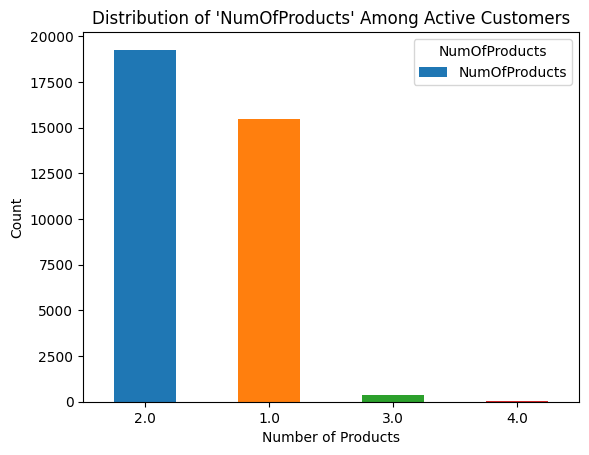

In [ ]:
#visualize
num_of_products_counts = active_customers['NumOfProducts'].value_counts()

# Plot a chart
num_of_products_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title("Distribution of 'NumOfProducts' Among Active Customers")
plt.xlabel("Number of Products")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='NumOfProducts', loc='upper right')
plt.show()

Most cx's use 2 products followed by one. We assume the more the products cx consumes, the higher the revenues.

Let's analyze the average characteristics of each consumer group so that we can assess how to support one group to another i.e., from 2 to3 products.

If we can get a huge outlier base towards 3 and 4 products, the customers get sophisticated, contributing more revenues.

In [ ]:
#create dataframes using active customers
active_customers = df[df['IsActiveMember'] == 1]

products_4 = active_customers[active_customers['NumOfProducts'] == 4]
products_3 = active_customers[active_customers['NumOfProducts'] == 3]
products_2 = active_customers[active_customers['NumOfProducts'] == 2]
products_1 = active_customers[active_customers['NumOfProducts'] == 1]

In [ ]:
products_4.describe()

,id,CustomerId,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,65.000000,6.500000e+01,65.000000,65.00000,65.000000,65.0,65.000000,65.0,65.000000
mean,199541.753846,1.568376e+07,0.461538,4.60000,81767.970154,4.0,0.615385,1.0,118403.600000
std,20718.186210,6.833552e+04,0.502398,2.65636,66148.333313,0.0,0.490290,0.0,46938.566889
min,166036.000000,1.556629e+07,0.000000,1.00000,0.000000,4.0,0.000000,1.0,13614.000000
25%,184104.000000,1.562478e+07,0.000000,3.00000,0.000000,4.0,0.000000,1.0,86734.000000
50%,195703.000000,1.568696e+07,0.000000,4.00000,113880.230000,4.0,1.000000,1.0,130752.000000
75%,220004.000000,1.574018e+07,1.000000,7.00000,134712.810000,4.0,1.000000,1.0,156695.000000
max,234617.000000,1.580117e+07,1.000000,10.00000,195238.290000,4.0,1.000000,1.0,188306.000000


In [ ]:
products_3.describe()

,id,CustomerId,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,386.000000,3.860000e+02,386.000000,386.000000,386.000000,386.0,386.000000,386.0,386.000000
mean,203147.733161,1.569331e+07,0.471503,5.111399,63412.102902,3.0,0.699482,1.0,110182.598446
std,20635.932427,7.290800e+04,0.499835,2.810098,63436.315758,0.0,0.459078,0.0,50481.669398
min,165230.000000,1.556783e+07,0.000000,0.000000,0.000000,3.0,0.000000,1.0,1711.000000
25%,186917.000000,1.562993e+07,0.000000,3.000000,0.000000,3.0,0.000000,1.0,70891.750000
50%,204981.000000,1.569254e+07,0.000000,5.000000,73574.120000,3.0,1.000000,1.0,112984.000000
75%,221138.000000,1.575882e+07,1.000000,7.000000,122070.635000,3.0,1.000000,1.0,153520.000000
max,236377.000000,1.581428e+07,1.000000,10.000000,186788.340000,3.0,1.000000,1.0,198970.000000


In [ ]:
products_2.describe()

,id,CustomerId,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,19269.000000,1.926900e+04,19269.000000,19269.000000,19269.000000,19269.0,19269.000000,19269.0,19269.000000
mean,200595.116664,1.569263e+07,0.597488,4.995018,29968.473852,2.0,0.749390,1.0,111443.347916
std,20565.180545,7.146785e+04,0.490417,2.772679,53705.859841,0.0,0.433375,0.0,50559.841306
min,165034.000000,1.556571e+07,0.000000,0.000000,0.000000,2.0,0.000000,1.0,12.000000
25%,182785.000000,1.563404e+07,0.000000,3.000000,0.000000,2.0,0.000000,1.0,73570.000000
50%,200558.000000,1.569090e+07,1.000000,5.000000,0.000000,2.0,1.000000,1.0,116851.000000
75%,218265.000000,1.575695e+07,1.000000,7.000000,0.000000,2.0,1.000000,1.0,152884.000000
max,236376.000000,1.581569e+07,1.000000,10.000000,212314.030000,2.0,1.000000,1.0,199992.000000


In [ ]:
products_1.describe()

,id,CustomerId,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,15501.000000,1.550100e+04,15501.000000,15501.000000,15501.000000,15501.0,15501.000000,15501.0,15501.000000
mean,200747.866460,1.569195e+07,0.559899,4.947100,84171.377204,1.0,0.733630,1.0,111508.348236
std,20589.978654,7.194290e+04,0.496415,2.821309,59848.485947,0.0,0.442074,0.0,50397.122720
min,165044.000000,1.556571e+07,0.000000,0.000000,0.000000,1.0,0.000000,1.0,12.000000
25%,182922.000000,1.563247e+07,0.000000,3.000000,0.000000,1.0,0.000000,1.0,73330.000000
50%,200572.000000,1.569018e+07,1.000000,5.000000,107193.820000,1.0,1.000000,1.0,116880.000000
75%,218660.000000,1.575692e+07,1.000000,7.000000,131033.760000,1.0,1.000000,1.0,153606.000000
max,236375.000000,1.581569e+07,1.000000,10.000000,221532.800000,1.0,1.000000,1.0,199954.000000


The most varying  detail across is Estimated Salary.

Cx's who consume 4 products have a higher average salary than all others and a pretty solid average account balance considering their count.

Tenure revolves around 5 years, meaningless as of now.

So we can say cx's consume products in relation to their disposable income and expenditure habits.

Bank can first work on moving all customers with a salary higher than 118K to buying atleast 4 products.

This may help improve revenues .

In [ ]:
#how many active cx's have salaries above 118K

above_118k = df[(df['IsActiveMember'] == 1) & (df['EstimatedSalary'] > 118000)]
num_above_118k = len(above_118k)
print("Number of active customers with an EstimatedSalary > $118,000:", num_above_118k)

Number of active customers with an EstimatedSalary > $118,000: 17385


In [ ]:
#get distribution per market

above_118k = df[(df['IsActiveMember'] == 1) & (df['EstimatedSalary'] >= 118000)]
distribution = above_118k.groupby('Geography').size()
percentage_share = round((distribution / distribution.sum()) * 100,2)
print("Distribution of active customers with salaries above or equal to $118,000 per Market:")
print(percentage_share)

Distribution of active customers with salaries above or equal to $118,000 per Market:
Geography
France     57.81
Germany    19.80
Spain      22.38
dtype: float64


There are 17,385 such active customers. If all of them buy the 4 products, it may lead to healthier returns.

France has a 57% share of customers earning above 118K. This reflects economic dominance in that market thus a good prospect for supporting more and more customers to sophistication.

Such markets may improve the Bank's margins efficiently.

However different customers have different ambitions and customization can work where existing product doesn't.

In [ ]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_Category,Salary_intervals,Account_balance,Age_Intervals
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0,1,160977,Fair,200K,0,18-29
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1,0,72549,Good,100K,0,40-49
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1,0,138882,Fair,150K,0,30-39
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1,0,113932,Good,150K,0,30-39
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1,0,139431,Very Good,150K,150K,30-39


**CORRELATIONS**

In [ ]:
#LET'S extract some correlations

# get correlation between 'NumOfProducts' and 'IsActiveMember'
correlation = df['NumOfProducts'].corr(df['IsActiveMember'])
print(f"Correlation between NumOfProducts and IsActiveMember: {correlation}")

Correlation between NumOfProducts and IsActiveMember: 0.03616263789455525


Almost no relationship between the two, we can't use them to define another

In [ ]:
# get correlation between 'Account_balance' and 'IsActiveMember'

correlation = df['Balance'].corr(df['IsActiveMember'])
print(f"Correlation between Account balance and IsActiveMember: {correlation}")

Correlation between Account_balance and IsActiveMember: -0.013474568739005951


They have a very weak -ve relationship which has little meaning to us.

In [ ]:
# get correlation between 'CreditScore' and 'IsActiveMember'
correlation = df['CreditScore'].corr(df['IsActiveMember'])
print(f"Correlation between CreditScore and IsActiveMember: {correlation}")

Correlation between CreditScore and IsActiveMember: 0.014514639300965753


Almost null relationship between the two

In [ ]:
# get correlation between 'EstimatedSalary' and 'IsActiveMember'
correlation = df['EstimatedSalary'].corr(df['IsActiveMember'])
print(f"Correlation between EstimatedSalary and IsActiveMember: {correlation}")

Correlation between EstimatedSalary and IsActiveMember: -0.009378852977020402


There is no relationship between the two.